<a href="https://colab.research.google.com/github/harpalpatel/Parallelism_of_minmax_algo/blob/main/communitydetection_facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tweepy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import keys
import json
import re
from textblob import TextBlob
import tweepy as tw
consumer_key = keys.Twitter_API_Key
consumer_secret = keys.Twitter_API_Key_Secret
bearer_token = keys.Twitter_Bearer_Token

auth = tw.OAuthHandler(consumer_key, consumer_secret)
api = tw.API(auth, wait_on_rate_limit=True)

def clean_tweet(tweet):
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", tweet).split())
def get_tweet_sentiment(tweet):
  # create TextBlob object of passed tweet text 
  analysis = TextBlob(clean_tweet(tweet))
  # set sentiment
  #Sentiment Analysis with TextBlob
#TextBlob is excellent open-source library for performing sentiment analysis. 
#Typically, we quantify this sentiment with a positive or negative value, called polarity. 
#The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score.
  if analysis.sentiment.polarity > 0:
    return 'positive'
  elif analysis.sentiment.polarity == 0:
    return 'neutral'
  else:
    return 'negative'

def get_tweets(query):
  #tweets = []

  # get tweets from the API
  tweets = tw.Cursor(api.search,q=query,lang="en",since="2019-09-16").items(1000)
  
  # store the API responses in a list
  tweets_copy = []
  for tweet in tweets:
    parsed_tweet = {}
    parsed_tweet['text'] = tweet._json['text']
    parsed_tweet['sentiment'] = get_tweet_sentiment(tweet._json['text'])
    #print(tweet)
    if tweet._json['retweet_count'] > 0:
      if parsed_tweet not in tweets_copy:
        tweets_copy.append(parsed_tweet)
      else:
        tweets_copy.append(parsed_tweet)
  return tweets_copy

#search_query = "#covid19 -filter:retweets"

def tweet_json(tweet):
  response= tweet._json['text']
  return response

queries = ['(farmers AND protest) lang:en', '(covid) lang:en','(petrol AND price AND hike) lang:en']
for q in queries:
  print(q)
  tweets = get_tweets(q)
  #print(tweets)
  ptweets=[]
  ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
  for tweet in tweets:
    if tweet['sentiment'] == 'positive':
      ptweets.append(tweet)
  print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
  ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
  print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
  print("Neutral tweets percentage: {} %".format(abs(100*(len(tweets) - (len(ntweets)+len(ptweets)))/len(tweets))))

(farmers AND protest) lang:en
Positive tweets percentage: 64.66321243523316 %
Negative tweets percentage: 22.27979274611399 %
Neutral tweets percentage: 13.05699481865285 %
(covid) lang:en
Positive tweets percentage: 102.74725274725274 %
Negative tweets percentage: 19.36813186813187 %
Neutral tweets percentage: 22.115384615384617 %
(petrol AND price AND hike) lang:en
Positive tweets percentage: 7.868020304568528 %
Negative tweets percentage: 15.98984771573604 %
Neutral tweets percentage: 76.14213197969544 %


In [ ]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)
data_path = './twitter2.txt'
G_social = nx.read_edgelist(data_path)
#read_edgelist(path)
#Read a graph from a list of edges.

In [ ]:
pos = nx.spring_layout(G_social, k=0.1)
#spring_layout
#spring_layout(G, k=None)
#Position nodes using Fruchterman-Reingold force-directed algorithm.
#The algorithm simulates a force-directed representation of the network treating edges as springs holding nodes close, 
#while treating nodes as repelling objects, sometimes called an anti-gravity force. 
#Simulation continues until the positions are close to an equilibrium.

plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(G_social, pos=pos, node_size=0, edge_color="#444444", alpha=0.05, with_labels=False)
#draw_networkx(G, pos=None, arrows=None, with_labels=True, **kwds)[source]
#Draw the graph G using Matplotlib.
#Draw the graph with Matplotlib with options for node positions, labeling, titles, and many other drawing features. 

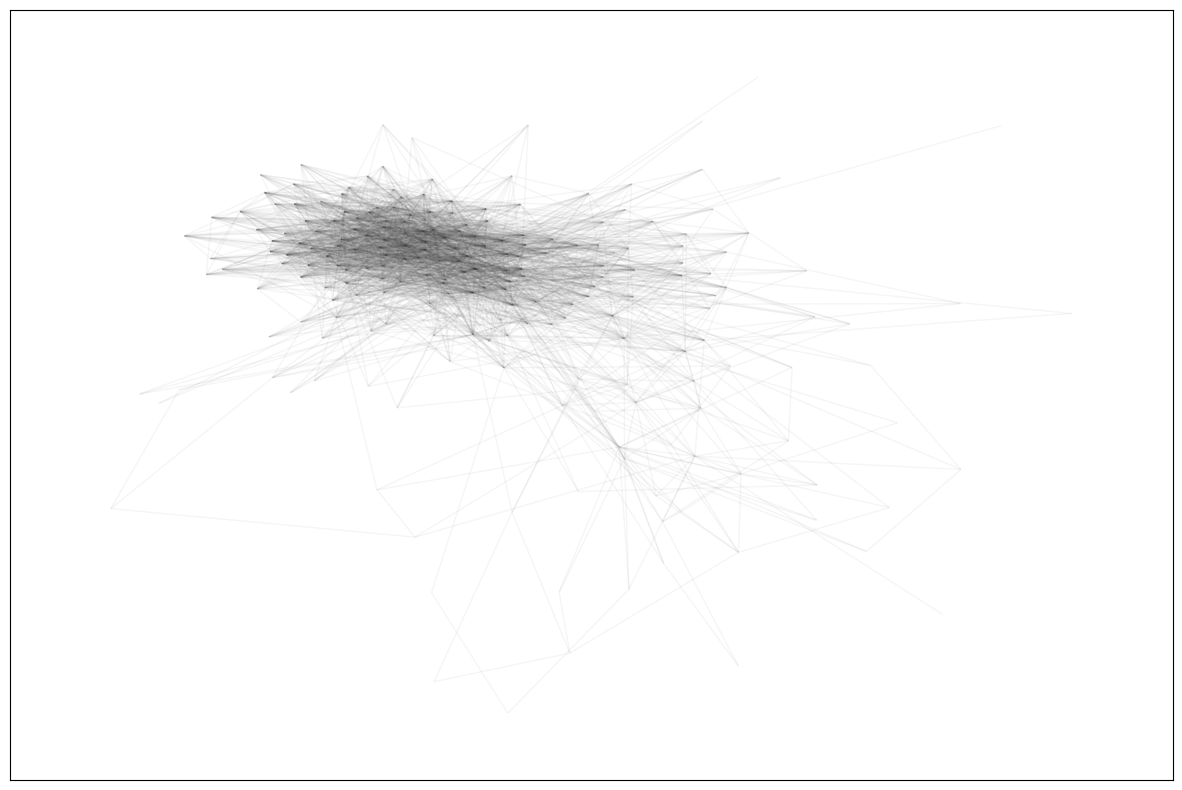

In [ ]:
plt.show()

In [ ]:
import networkx as nx
import networkx.algorithms.community as nxcom
communities = sorted(nxcom.greedy_modularity_communities(G_social), key=len, reverse=True)
print(communities)
len(communities)
#greedy_modularity_communities(G, weight=None, resolution=1, cutoff=1, best_n=None, n_communities=None)[source]
#Find communities in G using greedy modularity maximization.
#This function uses Clauset-Newman-Moore greedy modularity maximization [2] to find the community partition with the largest modularity.
#Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities 
#that lead to the largest modularity until no futher increase in modularity is possible (a maximum). 
#This function maximizes the generalized modularity, where resolution is the resolution parameter.

[frozenset({'166214735', '31246395', '31457243', '95260836', '288485704', '222090651', '179138862', '112939321', '203338499', '21272026', '294752666', '312284236', '128721580', '17434613', '46831674', '29911100', '460282402', '233248636', '88323281', '40981798', '37270037', '43640117', '45333725', '272173354', '15150609', '33612973', '113058991', '2367911', '477094958', '186212304', '187773078', '271602109', '33806113', '49104918', '349413327', '152388029', '81446304', '9695312', '116498875', '197504076', '70492333', '189875309', '31317273', '22462180', '163238842', '276706356', '207594668', '28019653', '254610699', '333161611', '226165839', '215787132', '117901353', '83155222', '172883064', '309782398', '220068522', '27633075', '262340283', '8163442', '200559228', '307458983', '43003845', '28465635', '260705759', '115221382', '83417972', '364971269', '258140947', '109740608', '88097807', '35359596', '158419434', '247741328', '19493072', '324201646', '133055665', '226629405', '34428380

4